<a href="https://colab.research.google.com/github/majo-mh/ProgramacionOrientadaObjeros/blob/main/multiCapas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [3]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
modelo.compile(
 optimizer=tf.keras.optimizers.Adam(0.1),
 loss='mean_squared_error'
)
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


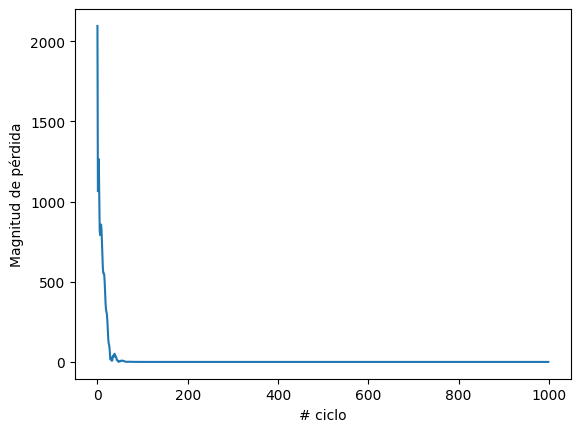

In [5]:
plt.xlabel("# ciclo")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [6]:
print("Hagamos una predicción!")
resultado = modelo.predict(np.array([10.0]))
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
El resultado es [[49.932022]] fahrenheit!


In [7]:
print("Variables internas del modelo")
print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[1.5698498]], dtype=float32), array([0.], dtype=float32)]
[array([[-0.21673   ,  0.73448545,  0.26219937]], dtype=float32), array([2.7393236, 3.23582  , 2.9300866], dtype=float32)]
[array([[ 0.9695592 ,  0.20692925, -0.987726  ],
       [ 1.0448942 ,  0.1586386 , -1.0733422 ],
       [ 0.8080967 , -0.06379293,  0.09088381]], dtype=float32), array([ 3.1685717, -2.7796853, -3.1102762], dtype=float32)]
[array([[ 1.4610786],
       [-0.3136553],
       [-1.2558843]], dtype=float32), array([3.119583], dtype=float32)]
